# Lab 2

#### Joseph Livesey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

import warnings
warnings.filterwarnings('ignore')

## Problem 1

In this lab, we are exploring how summing and averaging background distributions over multiple trials affects physical investigations. Let's say we are searching for gamma ray sources, and must account for background noise derived from cosmic rays. Let the average cosmic-ray background in 1 day be $X = 7.5$ and the average number of gamma rays emitted by the source in question is $Y = 50$. We can see how this background changes when we sum over multiple days and average the resulting distributions. The background is Poissonian, $\sim \text{Pois}(7.5)$.

In [2]:
background_1 = [stats.poisson(7.5).pmf(k) for k in np.arange(0, 100)]
background_2 = signal.convolve(background_1, background_1)
background_3 = signal.convolve(background_2, background_1)
background_4 = signal.convolve(background_3, background_1)
background_5 = signal.convolve(background_4, background_1)
background_6 = signal.convolve(background_5, background_1)
background_7 = signal.convolve(background_6, background_1)
background_8 = signal.convolve(background_7, background_1)
background_9 = signal.convolve(background_8, background_1)
background_10 = signal.convolve(background_9, background_1)

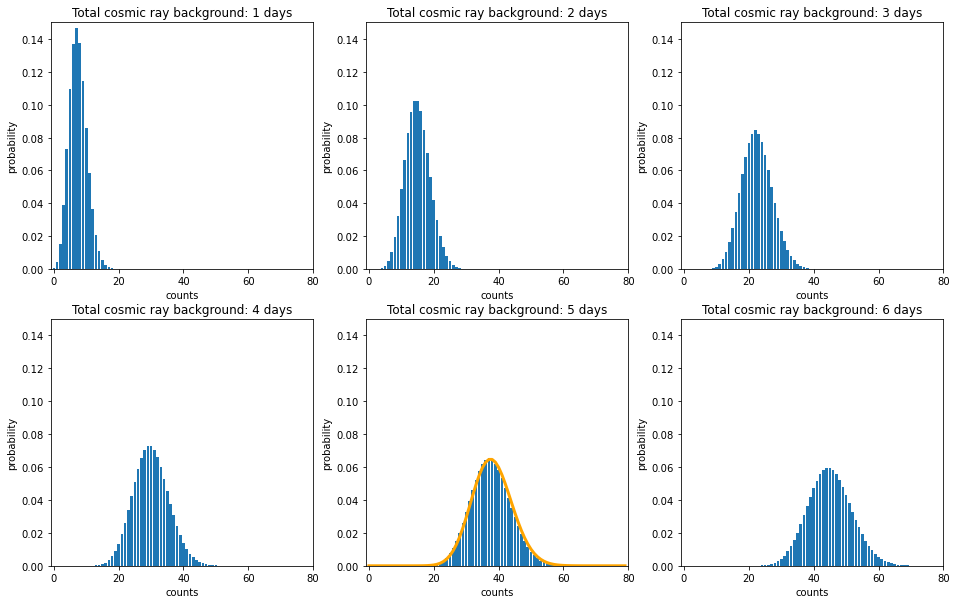

In [3]:
k = np.arange(0, 80)

fig, ax = plt.subplots(2, 3, figsize=(16, 10))
ax[0, 0].bar(range(len(background_1)), background_1)
ax[0, 1].bar(range(len(background_2)), background_2)
ax[0, 2].bar(range(len(background_3)), background_3)
ax[1, 0].bar(range(len(background_4)), background_4)
ax[1, 1].bar(range(len(background_5)), background_5)
ax[1, 1].plot(k, stats.poisson(38).pmf(k), color='orange', lw=3)
ax[1, 2].bar(range(len(background_6)), background_6)
n = 1
for i in range(2):
    for j in range(3):
        ax[i, j].set_title('Total cosmic ray background: ' + str(n) + ' days')
        n += 1
        ax[i, j].set_xlabel('counts')
        ax[i ,j].set_ylabel('probability')
        ax[i, j].set_xlim(-1, 80)
        ax[i, j].set_ylim(0, 0.15);

The background after 5 days has an average of 38 cosmic ray counts. Overplotting a Poisson pdf with parameter 38 reveals that this distribution remains Poissonian. The pmf of a Poisson-distributed (with parameter $\lambda$) random variable is

$$ f(k) = \frac{\lambda^k}{k!} e^{-\lambda}. $$

So, the convolution of a Poisson distribution with itself is

$$
(f * f)(k) = \sum_{t=0}^k \frac{\lambda^t e^{-\lambda}}{t!} \frac{\lambda^{k-t} e^{-\lambda}}{(k - t)!} = \lambda^k e^{-2\lambda} \sum_{t=0}^k \frac{1}{t!(k - t)!} = \frac{\lambda^k e^{-2\lambda}}{k!} \sum_{t=0}^k \frac{k!}{t!(k - t)!} = \frac{\lambda^k e^{-2\lambda}}{k!} \sum_{t=0}^k \binom{k}{t} = \frac{(2\lambda)^k e^{-2\lambda}}{k!},
$$

the pmf of a Poisson distribution with parameter $2\lambda$ (average twice as great). Mathematically, it makes sense that convolution of two Poisson distributions is always Poissonian. Conceptually, the Poisson distribution counts the number of independent events (like cosmic ray counts) over a certain interval of time or space. So, it makes sense that the background is always Poissonian.

Now, let's *average* the background over several observing days.

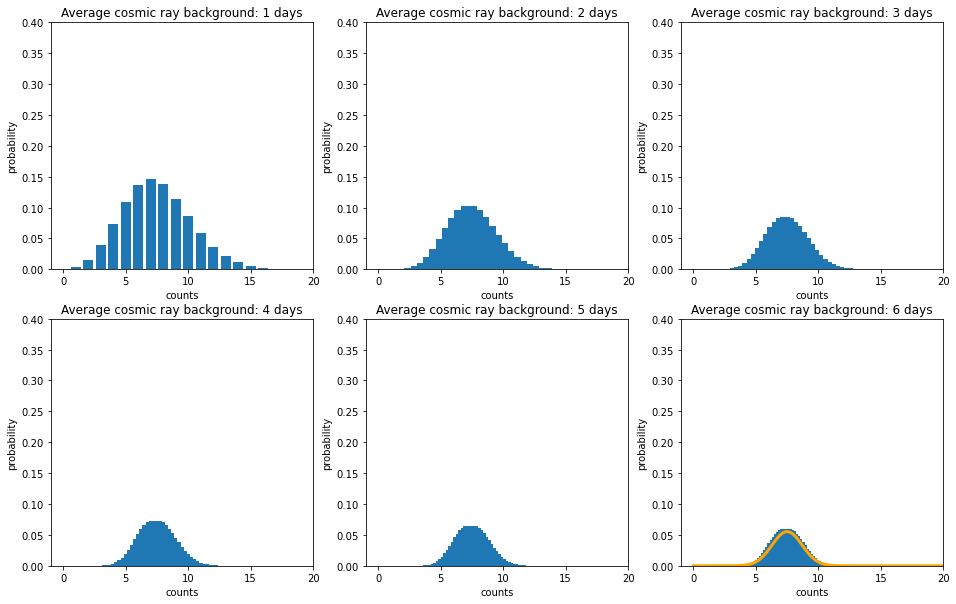

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
ax[0, 0].bar(range(len(background_1)), background_1)
ax[0, 1].bar([k/2 for k in range(len(background_2))], background_2)
ax[0, 2].bar([k/3 for k in range(len(background_3))], background_3)
ax[1, 0].bar([k/4 for k in range(len(background_4))], background_4)
ax[1, 1].bar([k/5 for k in range(len(background_5))], background_5)
ax[1, 2].bar([k/6 for k in range(len(background_6))], background_6)
ax[1, 2].plot([k/6 for k in range(len(background_6))], stats.norm.pdf([k/6 for k in range(len(background_6))], loc=7.5, scale=1.2) / 6, color='orange', lw=3)
n = 1
for i in range(2):
    for j in range(3):
        ax[i, j].set_title('Average cosmic ray background: ' + str(n) + ' days')
        n += 1
        ax[i, j].set_xlabel('counts')
        ax[i, j].set_ylabel('probability')
        ax[i, j].set_xlim(-1, 20)
        ax[i, j].set_ylim(0, 0.4);

Clearly, it is advantageous to average over multiple days, as this reduces the probability of a false measurement close to the mean of the distribution. By overplotting a Gaussian curve on the plot for 6 days of observation, we see that the background is approaching a Gaussian distribution. This accords with the Central Limit Theorem, by which any distribution averaged over enough time (or space, etc.) will approach a Gaussian distribution. This does not violate the principle explored with the last set of plots, that the non-averaged background integrated over time remains Poissonian. Averaging has the effect of reducing the variance by a factor of the number of trials, which changes the shape of the distribution.

Let's assume that we took measurements over $N=10$ days. We then expect that we have observed $YN = 500$ gamma rays in this time. We want to determine the significance of this measurement against the background. Concisely stated: What is the probability that the background created a signal of this strength (or greater)? In math: Let $\text{pmf}(k)$ be the probability mass function. What is the probability $p(YN)$?

$$ p(YN) = \sum_{k=YN}^\infty \text{pmf}(k) $$

We can use our already-calculated Poisson distribution convolved 10 times.

In [5]:
total = sum(background_10)
tail = sum(background_10[499:])

probability = tail/total
probability

5.842515586585047e-229

We can now use `scipy` to convert this to a sigma value.

In [6]:
sigma = stats.norm.ppf(probability)
sigma

-32.28412469108659

This situation I made up would be incredible in real life, because it corresponds to a $32\sigma$ measurement.

## Problem 2

Now, we will look at how a skewed distribution changes when averaged over many trials. Let the background over some observing interval be given by a Rayleigh distribution, centered on $x = 1.0$ for simplicity's sake.

In [7]:
xx = np.linspace(0, 10, 1000)
background_1 = [stats.rayleigh.pdf(x) for x in xx]

In [8]:
def background(original, n):
    background = original
    for _ in range(n - 1):
        background = signal.convolve(background, original)
    return background

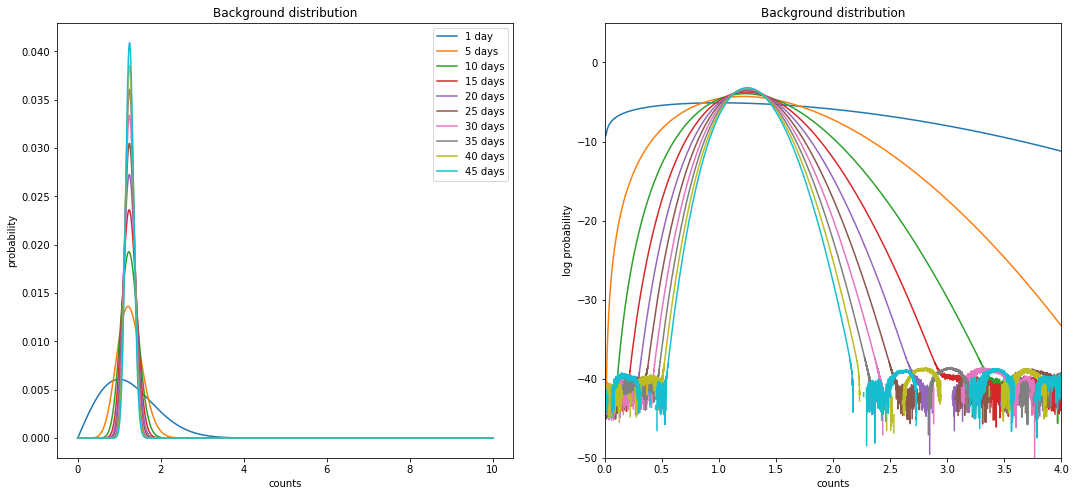

In [9]:
days = 50

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(xx, background_1 / sum(background_1), label='1 day')
ax[1].plot(xx, np.log(background_1 / sum(background_1)))
for n in np.arange(1, days):
    if n % 5 == 0:
        background_n = background(background_1, n)
        n_range = np.linspace(0, 10, len(background_n))
        ax[0].plot(n_range, n * background_n / sum(background_n), label=str(n)+' days')
        ax[1].plot(n_range, np.log(n * background_n / sum(background_n)))
ax[0].legend(loc=0)
ax[0].set_title('Background distribution')
ax[0].set_xlabel('counts')
ax[0].set_ylabel('probability')
ax[1].set_title('Background distribution')
ax[1].set_xlabel('counts')
ax[1].set_ylabel('log probability')
ax[1].set_xlim(0, 4)
ax[1].set_ylim(-50, 5);

As we average over many observing intervals, we see that the variance of the background decreases. This means that we can make significant detections closer to the mean of the background. We also see that our originally-Rayleigh background noise begins to approach a Gaussian distribution. We can tell this first because it becomes more symmetric as time goes on, and because on a semilog plot it approaches a parabola. From visual inspection of the latter plot, it seems that it takes $\sim 30-40$ intervals for the distribution to look sufficiently Gaussian in the neighborhood of the mean.

## Problem 3

### Version 1

Now we will explore what happens when we do and do not know where to look for a signal. Let's imagine that our background is distributed as a Gaussian, with $\mu=7.5$ and $\sigma=6.0$, $X \sim \mathcal{N}(7.5,36)$. Say we detect a signal of strength $Y = 22.3328$. We will go through our usual method of determining the significance of this detection.

In [10]:
xx = np.linspace(0, 50, 1000)

1 - stats.norm.cdf(22.3328, loc=7.5, scale=6.0)

0.00671547064547251

This is the probability that the background produced a signal of strength $\geq Y$. We must now convert this to a sigma value, i.e., the corresponding position on the standard normal distribution.

In [11]:
stats.norm.ppf(0.00671547064547251)

-2.4721333333333315

This is roughly a $2.5\sigma$ detection, not nearly enough to claim a discovery (as we would need ).

### Version 2

Now we need to search 10,000 pixels for the brightest signal and determine whether this represents a significant detection. The one we find is still of strength $Y$. When we want to find the significance of a signal given some background over $N$ trials, we are finding its significance when measured against this background amplified by a factor of $N$. Therefore, to find the significance of the signal of strength $Y$ with the trials factor, we must integrate the one-pixel background distribution over $[Y/N, \infty)$.

In [12]:
1 - stats.norm.cdf(22.3328/10000, loc=7.5, scale=6.0)

0.8942822260919158

In [13]:
stats.norm.ppf(0.8942822260919158)

1.2496277866666672

We find a $\sim 1.2\sigma$ significance now, much less than when we were examining a signal in one pixel.

## Problem 4

We want to determine the "sensitivity penalty" introduced by the trials factor, *i.e.*, how much more the signal must deviate from the mean of the background in order to be considered significant when looking at all 10,000 pixels. To find the probability distribution of the background for 10,000 pixels, we took the original background for one pixel and scaled it by the number of "trials", 10,000. We want to calculate the detection threshold for the 1-pixel and 10k-pixel cases.

In [14]:
prob_5sigma = 1 - stats.norm.cdf(5.0)

stats.norm.ppf(1 - prob_5sigma, loc=7.5, scale=6.0)

37.49999999982106

In [15]:
prob_5sigma = 1 - stats.norm.cdf(5.0)

stats.norm.ppf(1 - prob_5sigma/10000, loc=7.5, scale=6.0)

46.80322492134993

This calculation indicates that the singal strengths necessary are of the same order of magnitude. The sensitivity penalty due to a trials factor is lower than one might initially expect, because when we look at "significant" detections, we are examining events on the tails of the Gaussian background distribution. In the tail, the cumulative distribution function is very close to unity. Thus, the measurement corresponding to $1 - \frac{\text{probability}}{10,000}$ is not much farther from the mean than that corresponding to $1 - \text{probability}$.